# Importing

In [5]:
#importing data and libraries now with twice the libraries
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Achievement 4 (J)'
df_combined = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','df_combined.pkl'))

In [6]:
import Levenshtein

In [7]:
#displaying the full table 
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,avg_spent,Spender_Type,median_since_last_order,Customer_frequency,first_name,last_name,gender,state,age,date_joined,n_dependants,marrtial_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# Removing personal identifiers 

In [8]:
# we are going to drop the names and merge columns both to clean the data and address PII
instacart = df_combined.drop(columns=['first_name','last_name','_merge'])
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,avg_spent,Spender_Type,median_since_last_order,Customer_frequency,gender,state,age,date_joined,n_dependants,marrtial_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Creating regional comparison

In [10]:
#instacart['state'].value_counts(dropna = False) old code
#double checking the spelling of the states to avoid errors 
terms = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho"
"Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri"
"Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon"
"Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia"
"Wisconsin", "Wyoming", "District of Columbia"]

comparisons = []

# Compare each term with every other term
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):  # Avoid comparing the same term to itself
        distance = Levenshtein.distance(terms[i], terms[j])
        comparisons.append({
            'term1': terms[i],
            'term2': terms[j],
            'levenshtein_distance': distance
        })
df = pd.DataFrame(comparisons)
df_sorted = df.sort_values(by="levenshtein_distance", ascending=True).reset_index(drop=True)
print(df_sorted)

                       term1                   term2  levenshtein_distance
0               North Dakota            South Dakota                     2
1             North Carolina          South Carolina                     2
2                    Alabama                  Alaska                     3
3                   Arkansas                  Kansas                     3
4                   Colorado                 Florida                     4
5                      Texas                    Utah                     4
6                    Florida                 Georgia                     4
7                     Hawaii                    Iowa                     4
8                       Iowa                    Ohio                     4
9                       Iowa                   Texas                     4
10                      Iowa                    Utah                     4
11                    Kansas                   Texas                     4
12                     Ma

In [11]:
#Northeast region
instacart.loc[instacart['state'] == 'Maine', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'New Hampshire', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Vermont', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Massachusetts', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Rhode Island', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Connecticut', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'New York', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Pennsylvania', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'New Jersey', 'region'] = 'Northeast'

In [12]:
#Midwest region
instacart.loc[instacart['state'] == 'Wisconsin', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Michigan', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Illinois', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Indiana', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Ohio', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'North Dakota', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'South Dakota', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Nebraska', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Kansas', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Minnesota', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Iowa', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Missouri', 'region'] = 'Midwest'

In [13]:
#South region
instacart.loc[instacart['state'] == 'Delaware', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Maryland', 'region'] = 'South'
instacart.loc[instacart['state'] == 'District of Columbia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Virginia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'West Virginia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'North Carolina', 'region'] = 'South'
instacart.loc[instacart['state'] == 'South Carolina', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Georgia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Florida', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Kentucky', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Tennessee', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Mississippi', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Alabama', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Oklahoma', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Texas', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Arkansas', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Louisiana', 'region'] = 'South'

In [14]:
# West region
instacart.loc[instacart['state'] == 'Idaho', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Montana', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Wyoming', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Nevada', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Utah', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Colorado', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Arizona', 'region'] = 'West'
instacart.loc[instacart['state'] == 'New Mexico', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Alaska', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Washington', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Oregon', 'region'] = 'West'
instacart.loc[instacart['state'] == 'California', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Hawaii', 'region'] = 'West'

In [15]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,avg_spent,Spender_Type,median_since_last_order,Customer_frequency,gender,state,age,date_joined,n_dependants,marrtial_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [16]:
#double checking incase we missed something
instacart['region'].value_counts(dropna = False)

region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [19]:
spending_per_region = pd.crosstab(instacart['Spender_Type'],instacart['region'])

In [20]:
spending_per_region.head()

region,Midwest,Northeast,South,West
Spender_Type,,,,
High spender,29265,18639,40577,31238
Low spender,7566800,5703253,10749519,8260441


# Removing low value customers

In [21]:
instacart.loc[instacart['max_order'] >= 5, 'activity'] = 'high'
instacart.loc[instacart['max_order'] < 5, 'activity'] = 'low'

In [22]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,avg_spent,Spender_Type,median_since_last_order,Customer_frequency,gender,state,age,date_joined,n_dependants,marrtial_status,income,region,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high


In [23]:
active_customers = instacart[instacart['activity'] == 'high']

In [24]:
active_customers['activity'].value_counts(dropna=False)

activity
high    30959687
Name: count, dtype: int64

In [25]:
#exporting the results
active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customers.pkl'))

# Customer Profiling

In [27]:
# Starting with income
active_customers.loc[active_customers['income'] <=58000 , 'economic_class'] = 'Lower'
active_customers.loc[(active_customers['income'] >=58000) & (active_customers['income'] <94000), 'economic_class'] = 'Middle'
active_customers.loc[active_customers['income'] >= 94000, 'economic_class'] = 'Upper'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25844\2120654178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers.loc[active_customers['income'] <=58000 , 'economic_class'] = 'Lower'


In [28]:
active_customers['economic_class'].value_counts(dropna=False)

economic_class
Upper     16563584
Middle     9116527
Lower      5279576
Name: count, dtype: int64

In [33]:
#old code
#active_customers.loc[active_customers['age'] <= 25 , 'age_group'] = 'Young Adult'
#active_customers.loc[(active_customers['age'] > 25) & (active_customers['age'] <=44), 'age_group'] = 'Adult'
#active_customers.loc[(active_customers['age'] > 44) & (active_customers['age'] <=64), 'age_group'] = 'Middle Age'
#active_customers.loc[active_customers['age'] >= 65 , 'age_group'] = 'Senior'
# adding a age variable with cut
bins = [0, 25, 45, 65, 100]
labels = ['Young Adult', 'Adult','Middle Age', 'Senior']
active_customers['age_group'] = pd.cut(active_customers['age'],  bins = bins, labels = labels, right=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25844\1970784489.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers['age_group'] = pd.cut(active_customers['age'],  bins = bins, labels = labels, right=False)


In [34]:
active_customers['age_group'].value_counts(dropna = False)

age_group
Middle Age     9688461
Adult          9662358
Senior         8194267
Young Adult    3414601
Name: count, dtype: int64

In [43]:
#importing departments to add to the active_customer df
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
df_departments

,Unnamed: 0,department_id,department
0,0,1,frozen
1,1,2,other
2,2,3,bakery
3,3,4,produce
4,4,5,alcohol
5,5,6,international
6,6,7,beverages
7,7,8,pets
8,8,9,dry goods pasta
9,9,10,bulk


In [44]:
df_departments = df_departments.drop(columns = 'Unnamed: 0')

In [45]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [46]:
df_final = active_customers.merge(df_departments, on= 'department_id', indicator = True)

In [47]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,avg_spent,Spender_Type,median_since_last_order,Customer_frequency,gender,state,age,date_joined,n_dependants,marrtial_status,income,region,activity,economic_class,age_group,department,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high,Lower,Adult,beverages,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Regularly busy,Mid-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high,Lower,Adult,dairy eggs,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high,Lower,Adult,snacks,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high,Lower,Adult,snacks,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Regularly busy,Low-range product,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high,Lower,Adult,household,both


In [48]:
df_final['_merge'].value_counts(dropna = False)

_merge
both          30959687
left_only            0
right_only           0
Name: count, dtype: int64

In [49]:
#droping the merge column after confirmation of merge
df_final = df_final.drop(columns = '_merge')

In [50]:
#exporting the final df to save it
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final.pkl'))

In [54]:
#checking for dependants
df_final.loc[df_final['n_dependants'] == 0 , 'dependants'] = 'No dependants'
df_final.loc[df_final['n_dependants'] >= 1, 'dependants'] = 'Has dependants'

In [55]:
df_final['dependants'].value_counts(dropna = False)

dependants
Has dependants    23221179
No dependants      7738508
Name: count, dtype: int64

# Creating visualizations for customer profiling 

In [59]:
#pie chart for dependants
df_dependants = df_final['dependants'].value_counts()

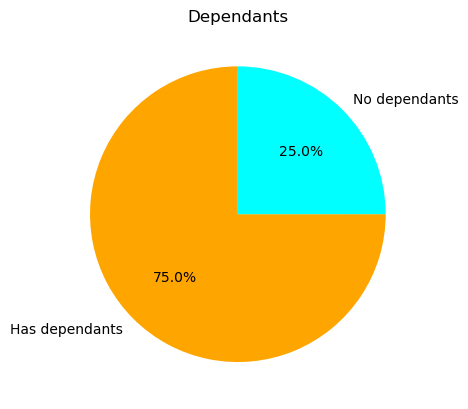

In [61]:
dependants = df_dependants.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = ['orange','cyan'])
plt.title('Dependants')
plt.ylabel('')  # Remove y-label
plt.show()

In [62]:
#exporting graph
dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Customers_vs_dependants.png'))

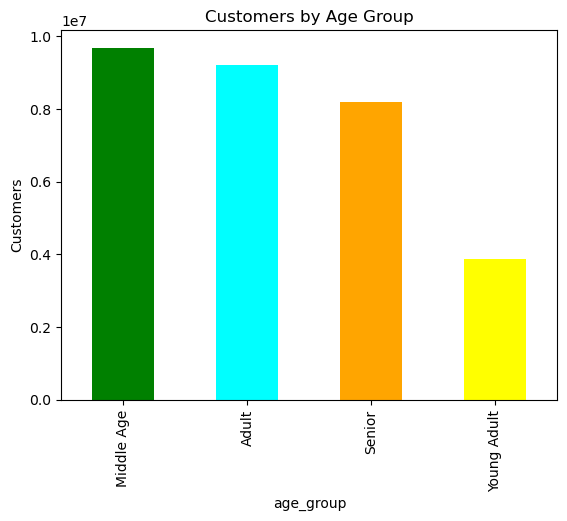

In [64]:
#bar chart for age groups
age_groups = df_final['age_group'].value_counts().plot.bar(color = ['green','cyan','orange', 'yellow'])
plt.title('Customers by Age Group')
plt.ylabel('Customers')  # Remove y-label
plt.show()

In [69]:
#exporting bar graph

In [65]:
age_groups.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_groups.png'))

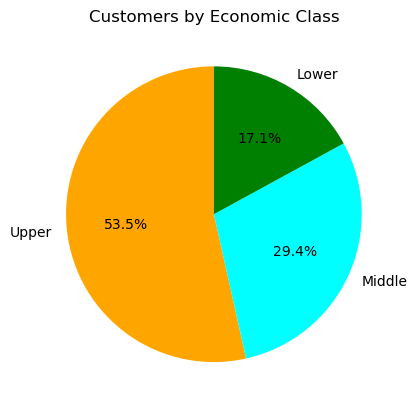

In [67]:
income_groups = df_final['economic_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = ['orange','cyan','green'])
plt.title('Customers by Economic Class')
plt.ylabel('')  # Remove y-label
plt.show()

In [70]:
#exporting pie chart

In [68]:
income_groups.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'income_groups.png'))

In [96]:
#spending by age group
spending_per_age_group = pd.crosstab(df_final['Spender_Type'],df_final['age_group'])

In [97]:
spending_per_age_group

age_group,Adult,Middle Age,Senior,Young Adult
Spender_Type,,,,
High spender,28062,31118,26874,11382
Low spender,9185030,9657343,8167393,3852485


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

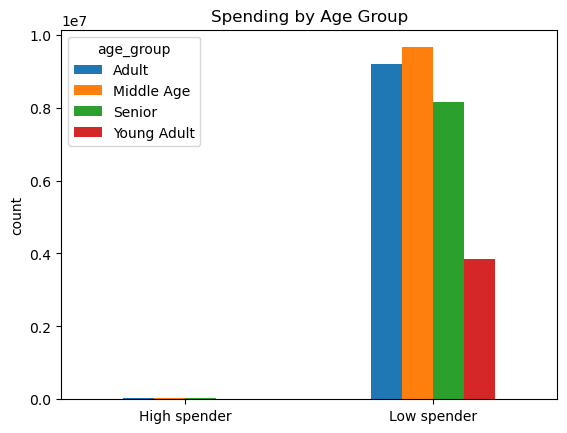

In [98]:
age_spending_bar = spending_per_age_group.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [99]:
#exporting
age_spending_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_spending_bar.png'))

In [101]:
#spending by department
df = df_final.groupby('department').agg({'prices':'sum'})
df

,prices
department,
alcohol,1178811.1
babies,3133096.4
bakery,8806886.2
beverages,19758773.9
breakfast,5388030.2
bulk,279212.8
canned goods,7637778.5
dairy eggs,43118260.7
deli,7813188.1


(array([       0., 10000000., 20000000., 30000000., 40000000., 50000000.,
        60000000., 70000000., 80000000.]),
 [Text(0.0, 0, '0'),
  Text(10000000.0, 0, '1'),
  Text(20000000.0, 0, '2'),
  Text(30000000.0, 0, '3'),
  Text(40000000.0, 0, '4'),
  Text(50000000.0, 0, '5'),
  Text(60000000.0, 0, '6'),
  Text(70000000.0, 0, '7'),
  Text(80000000.0, 0, '8')])

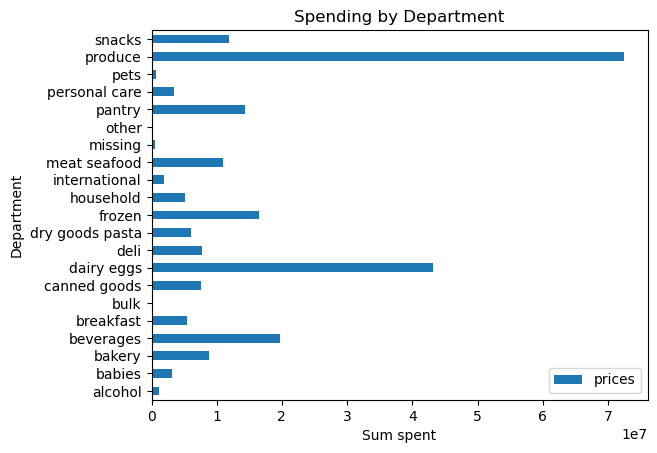

In [104]:
spending_by_department = df.plot.barh()
plt.title('Spending by Department')
plt.xlabel('Sum spent')
plt.ylabel('Department')
plt.xticks(rotation=0)

In [105]:
spending_by_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'department_spending_bar.png'))

(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

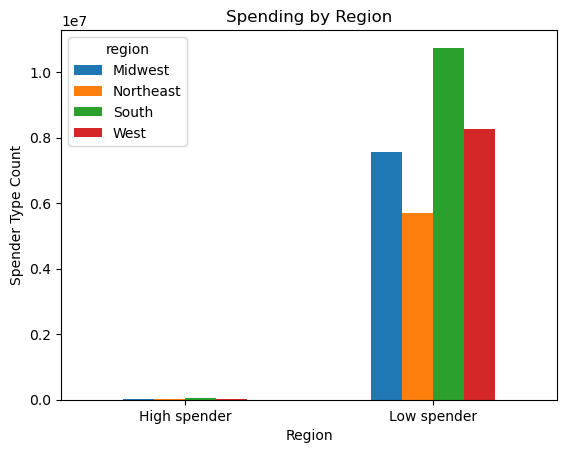

In [106]:
#spending by region
spending_per_region_bar = spending_per_region.plot.bar()
plt.title('Spending by Region')
plt.xlabel('Region')
plt.ylabel('Spender Type Count')
plt.xticks(rotation=0)

In [107]:
spending_per_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'spending_per_region_bar.png'))

# Aggregating customer information

In [141]:
#creating a subset that has all the prices of each order summed to aggregate them in the next step
customer = df_final.groupby(['user_id', 'gender', 'state', 'region', 'n_dependants', 'marrtial_status', 'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'loyalty_flag', 'Customer_frequency', 'dependants', 'economic_class', 'Spender_Type'])['prices'].sum().reset_index()

In [142]:
#frequency and spending by age
age_aggregate = customer.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [143]:
age_aggregate

days_since_prior_order                prices             
                              mean  min   max       mean  min     max
age_group                                                            
Adult                    10.403740  0.0  30.0  79.016010  1.0   829.2
Middle Age               10.382161  0.0  30.0  78.510544  1.0  1092.2
Senior                   10.372173  0.0  30.0  78.367220  1.0   751.1
Young Adult              10.380595  0.0  30.0  78.871788  1.0   842.1

In [144]:
#frequency and spending by region
region_aggregate = customer.groupby('region').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})
region_aggregate

days_since_prior_order                prices             
                            mean  min   max       mean  min     max
region                                                             
Midwest                10.457295  0.0  30.0  78.588492  1.0   751.1
Northeast              10.353240  0.0  30.0  78.670088  1.0  1092.2
South                  10.388247  0.0  30.0  78.627138  1.0   875.0
West                   10.339081  0.0  30.0  78.789436  1.0   852.5

In [145]:
#frequency and spending by economic class
economic_class_aggregate = customer.groupby('economic_class').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})
economic_class_aggregate

days_since_prior_order                prices             
                                 mean  min   max       mean  min     max
economic_class                                                          
Lower                       10.900440  0.0  30.0  59.210756  1.0   875.0
Middle                      10.209355  0.0  30.0  83.286911  1.0   775.7
Upper                       10.278625  0.0  30.0  83.846073  1.0  1092.2

In [147]:
#frequency and spending by dependants
dependants_aggregate = customer.groupby('dependants').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})
dependants_aggregate

days_since_prior_order                prices             
                                 mean  min   max       mean  min     max
dependants                                                              
Has dependants              10.388232  0.0  30.0  78.728823  1.0  1092.2
No dependants               10.378144  0.0  30.0  78.482647  1.0   875.0

# Customer profiles versus regions and departments

In [158]:
region_vs_dep = pd.crosstab(df_final['department'],df_final['region'])

In [150]:
region_vs_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1211283,913813,1721319,1325890
deli,234464,178398,333620,257352


In [151]:
# comparing age and region 
region_vs_age = pd.crosstab(df_final['age_group'],df_final['region'])
region_vs_age

region,Midwest,Northeast,South,West
age_group,,,,
Adult,2172532,1602142,3092186,2346232
Middle Age,2286085,1697295,3194457,2510624
Senior,1903728,1484610,2708062,2097867
Young Adult,897961,679835,1314737,971334


In [152]:
#comparing dependants by region
region_and_dependants = pd.crosstab(df_final['dependants'],df_final['region'])
region_and_dependants

region,Midwest,Northeast,South,West
dependants,,,,
Has dependants,5437775,4109605,7727930,5945869
No dependants,1822531,1354277,2581512,1980188


In [155]:
#comparing age groups and departments
departments_and_age = pd.crosstab(df_final['department'],df_final['age_group'])
departments_and_age

age_group,Adult,Middle Age,Senior,Young Adult
department,,,,
alcohol,42167,46579,36693,19188
babies,123044,129910,106204,51234
bakery,334154,350804,295997,139873
beverages,754851,814687,684020,318343
breakfast,198803,211274,175296,85477
bulk,9902,10298,8945,4306
canned goods,302479,315774,267509,126312
dairy eggs,1547768,1610900,1366795,646842
deli,299970,314110,265199,124555


In [156]:
#department by economic class
departments_per_eco_class = pd.crosstab(df_final['department'],df_final['economic_class'])
departments_per_eco_class

economic_class,Lower,Middle,Upper
department,,,
alcohol,26038,38838,79751
babies,51557,128353,230482
bakery,173831,332755,614242
beverages,548069,711833,1311999
breakfast,135687,189722,345441
bulk,6828,9870,16753
canned goods,139774,307653,564647
dairy eggs,816215,1549009,2807081
deli,168752,295515,539567


In [4]:
#needed loyalty vs spender chart so had to reimport at a later date

In [3]:
df_final = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','df_final.pkl'))
spending_vs_loyalty = pd.crosstab(df_final['loyalty_flag'],df_final['Spender_Type'])

In [9]:
# spender type versus family status
spending_per_marital_status = pd.crosstab(df_final['Spender_Type'],df_final['dependants'])

# Charts 

(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 [Text(0.0, 0, '0'),
  Text(2000000.0, 0, '2'),
  Text(4000000.0, 0, '4'),
  Text(6000000.0, 0, '6'),
  Text(8000000.0, 0, '8'),
  Text(10000000.0, 0, '10')])

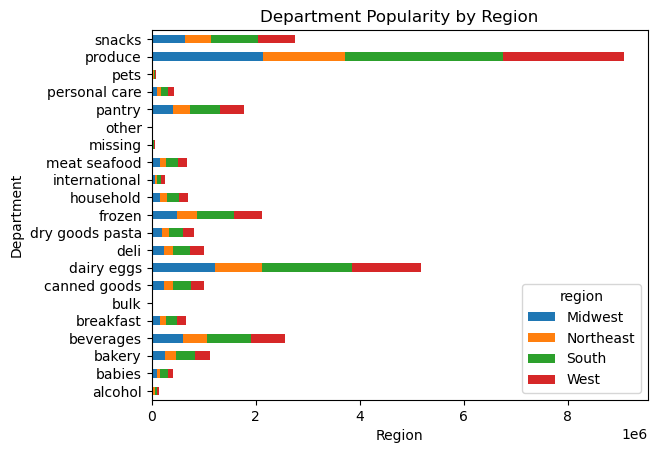

In [160]:
#stacked barchart for region versus department
region_popularity_by_region = region_vs_dep.plot.barh(stacked=True)
plt.title('Department Popularity by Region')
plt.xlabel('Region')
plt.ylabel('Department')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Adult'),
  Text(1, 0, 'Middle Age'),
  Text(2, 0, 'Senior'),
  Text(3, 0, 'Young Adult')])

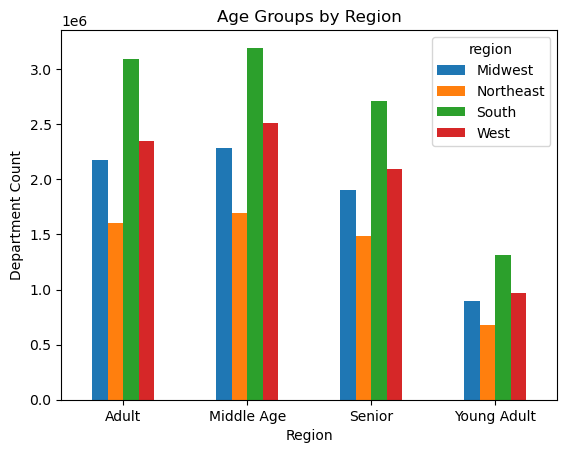

In [162]:
#Comparison of age groups and regions
region_vs_age_bar = region_vs_age.plot.bar()
plt.title('Age Groups by Region')
plt.xlabel('Region')
plt.ylabel('Department Count')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Has dependants'), Text(1, 0, 'No dependants')])

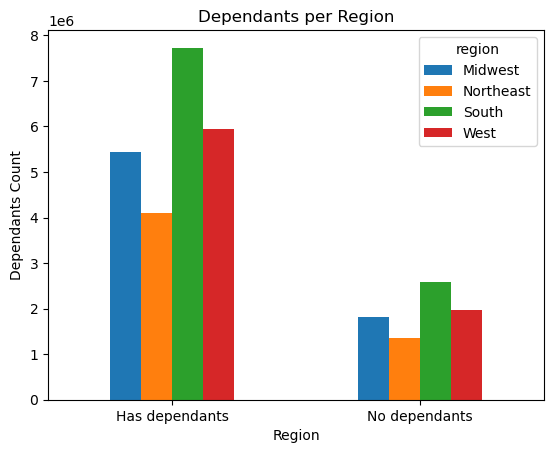

In [163]:
#dependants versus region
region_and_dependants_bar = region_and_dependants.plot.bar()
plt.title('Dependants per Region')
plt.xlabel('Region')
plt.ylabel('Dependants Count')
plt.xticks(rotation=0)

(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 [Text(0.0, 0, '0'),
  Text(2000000.0, 0, '2'),
  Text(4000000.0, 0, '4'),
  Text(6000000.0, 0, '6'),
  Text(8000000.0, 0, '8'),
  Text(10000000.0, 0, '10')])

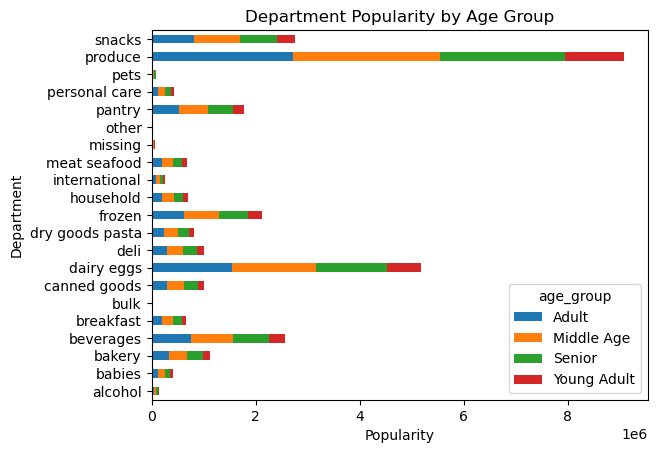

In [165]:
#Popularity of departments by age
departments_and_age_bar = departments_and_age.plot.barh(stacked=True)
plt.title('Department Popularity by Age Group')
plt.xlabel('Popularity')
plt.ylabel('Department')
plt.xticks(rotation=0)

(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 [Text(0.0, 0, '0'),
  Text(2000000.0, 0, '2'),
  Text(4000000.0, 0, '4'),
  Text(6000000.0, 0, '6'),
  Text(8000000.0, 0, '8'),
  Text(10000000.0, 0, '10')])

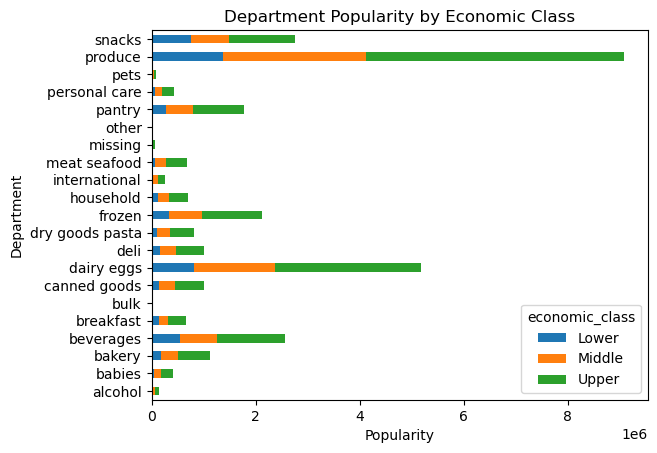

In [166]:
#Popularity of Departments per Economic Class
departments_per_eco_class_bar = departments_per_eco_class.plot.barh(stacked=True)
plt.title('Department Popularity by Economic Class')
plt.xlabel('Popularity')
plt.ylabel('Department')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

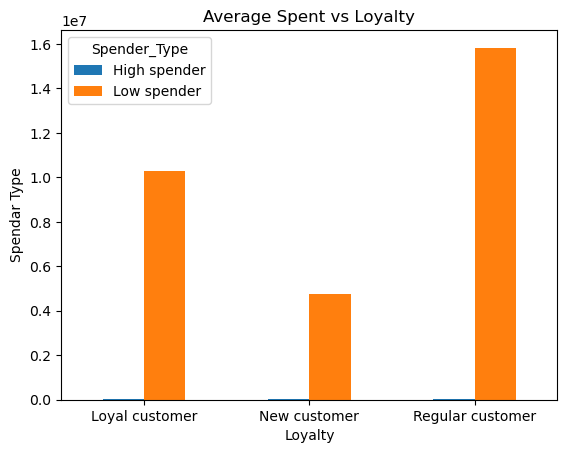

In [6]:
#average spending per loyalty
spending_vs_loyalty_bar = spending_vs_loyalty.plot.bar()
plt.title('Average Spent vs Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Spendar Type')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

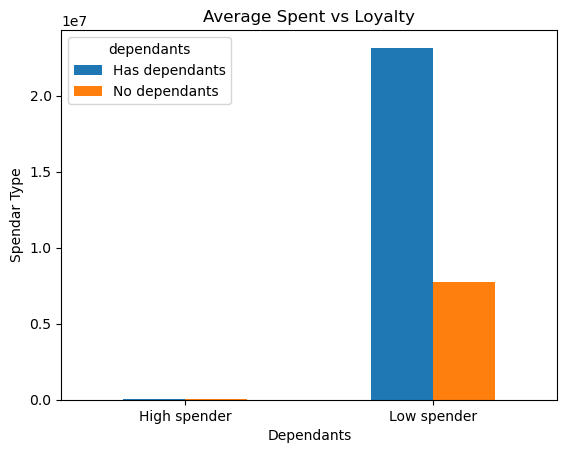

In [10]:
#average spending per family status
spending_per_marital_status_bar = spending_per_marital_status.plot.bar()
plt.title('Average Spent vs Loyalty')
plt.xlabel('Dependants')
plt.ylabel('Spendar Type')
plt.xticks(rotation=0)

# Exporting

In [167]:
region_popularity_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_popularity_by_region.png'))
region_vs_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_vs_age_bar.png'))
region_and_dependants_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_and_dependants_bar.png'))
departments_and_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'departments_and_age_bar.png'))
departments_per_eco_class_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'departments_per_eco_class_bar.png'))
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final.pkl'))
customer.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer.pkl'))

In [7]:
spending_vs_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'spending_vs_loyalty_bar.png'))

In [11]:
spending_per_marital_status_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'spending_per_marital_status_bar.png'))